**Brian Blaylock**  
*July 20, 2021*

# GFS Data
The product names are not as simple as the HRRR dataset, but we can still get GFS data.

In [1]:
from herbie.archive import Herbie
from toolbox.cartopy_tools import common_features, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [4]:
H = Herbie('2021-03-11', 
           model='gfs', 
           product='pgrb2.0p25')

🏋🏻‍♂️ Found 2021-Mar-11 00:00 UTC F00 [GFS] [product=pgrb2.0p25] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [5]:
H.SOURCES

{'aws': 'https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20210311/00/gfs.t00z.pgrb2.0p25.f000',
 'google': 'https://storage.googleapis.com/global-forecast-system/gfs.20210311/00/atmos/gfs.t00z.pgrb2.0p25.f000.grib2',
 'azure': 'https://noaahrrr.blob.core.windows.net/gfs/gfs.20210311/00/atmos/gfs.t00z.pgrb2.0p25.f000.grib2'}

In [6]:
x = H.xarray('TMP:2 m above')

👨🏻‍🏭 Created directory: [/p/cwfs/blaylock/data/gfs/20210311]
📇 Download subset: [GFS] model [pgrb2.0p25] product run at 2021-Mar-11 00:00 UTC F00                                                            
 cURL from https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20210311/00/gfs.t00z.pgrb2.0p25.f000
   1: GRIB_message=415 TMP:2 m above ground:anl
   2: GRIB_message=419 APTMP:2 m above ground:anl


Text(0.0, 1.0, 'GFS')

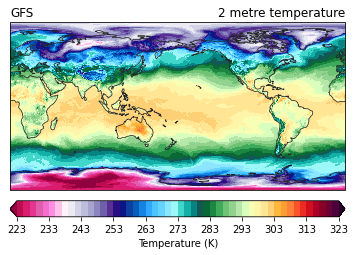

In [7]:
ax = common_features(crs=x.herbie.crs)
p = ax.pcolormesh(x.longitude, x.latitude, x.t2m, 
              transform=pc, 
              **cm_tmp(units='K').cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05,
             **cm_tmp(units='K').cbar_kwargs)

ax.set_title(x.t2m.GRIB_name, loc='right')
ax.set_title(f"GFS", loc='left')

Text(0.0, 1.0, 'GFS')

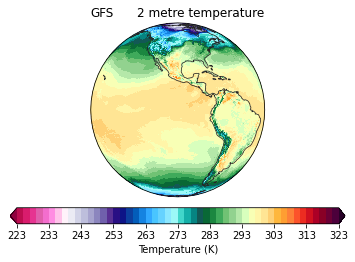

In [8]:
ax = common_features(crs=ccrs.Geostationary(central_longitude=-100))

p = ax.pcolormesh(x.longitude, x.latitude, x.t2m, 
              transform=pc, 
              **cm_tmp(units='K').cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05,
             **cm_tmp(units='K').cbar_kwargs)

ax.set_title(x.t2m.GRIB_name, loc='right')
ax.set_title(f"GFS", loc='left')